<a href="https://colab.research.google.com/github/rtomek9/project_votingGroup23DS3001/blob/main/model_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
! git clone https://github.com/DS3001/project_voting

Cloning into 'project_voting'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 70 (delta 5), reused 3 (delta 3), pack-reused 62
Receiving objects: 100% (70/70), 31.37 MiB | 17.04 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [9]:
pip install mapclassify

In [10]:
import geopandas as gpd
import mapclassify
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
import zipfile
import os

In [5]:
# path to your ZIP file
zip_path = 'VirginiaAdministrativeBoundary_ClippedToShoreline.shp.zip'
extract_path = '/content/extracted_files'
os.makedirs(extract_path, exist_ok=True)
# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [12]:
# Load data
gdf = gpd.read_file('/content/extracted_files/VirginiaCounty_ClippedToShoreline.shx') # Load Virginia shapefile for maps
vdf = pd.read_csv('/content/project_voting/data/voting_VA.csv') # Load historical voting data
cdf = pd.read_csv('/content/project_voting/data/county_adjacencies.csv') # Load county adjacency data and population data


In [13]:
# Merge shapefile data and county adjacency data:
gdf['FIPS_left'] = pd.to_numeric(gdf['STCOFIPS'])
df = gdf.merge(cdf,left_on='FIPS_left',right_on='FIPS')  # merge county population and adjacency data into df
del gdf, cdf

In [18]:
#Clean vote data and merge into the df we're using to make maps
df20 = vdf.loc[ vdf['year']==2020,:] # Only the 2020 data

Dvotes = df20.loc[(df20['party']=='DEMOCRAT'),:].groupby('county_fips')['candidatevotes'].sum()
Dvotes = Dvotes.rename('dem_votes_2020')
df = df.merge(Dvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

Rvotes = df20.loc[(df20['party']=='REPUBLICAN'),:].groupby('county_fips')['candidatevotes'].sum()
Rvotes = Rvotes.rename('rep_votes_2020')
df = df.merge(Rvotes,left_on='FIPS_left',right_on='county_fips') #df1.merge(df2, left_on='lkey', right_on='rkey

In [23]:
df.dropna()

,STCOFIPS,GNIS,NAME,NAMELSAD,GSOURCE,LADOPT,LASTUPDATE,JURISTYPE,AREASQMI,Shape_Leng,...,N8,N9,N10,N11,N12,dem_votes_2020,rep_votes_2020,vote_diff,vote_diff_ihs,Districts
62,51131,1480151,Northampton,Northampton County,T,N,2018-09-18,CO,715.969666,3.086460e+06,...,NorfolkCity,VirginiaBeachCity,HamptonCity,Gloucester,York,3667,2955,-712,-7.261226,2


In [19]:
print(df.columns)

Index(['STCOFIPS', 'GNIS', 'NAME', 'NAMELSAD', 'GSOURCE', 'LADOPT',
       'LASTUPDATE', 'JURISTYPE', 'AREASQMI', 'Shape_Leng', 'Shape_Area',
       'geometry', 'FIPS_left', 'County', 'Population2022', 'FIPS', 'District',
       'N1', 'N2', 'N3', 'N4', 'N5', 'N6', 'N7', 'N8', 'N9', 'N10', 'N11',
       'N12', 'dem_votes_2020', 'rep_votes_2020'],
      dtype='object')


<Axes: >

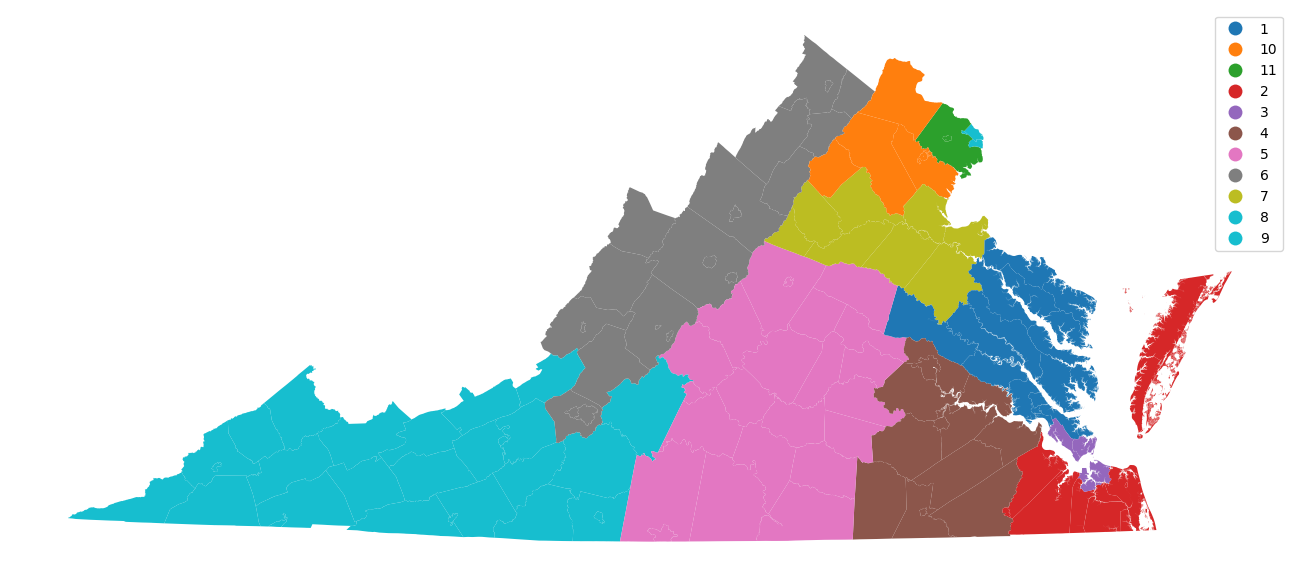

In [24]:
#choropleth map by districts
fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
#cax = divider.append_axes("right", size="2%", pad=0.08)
df['Districts'] = df['District'].astype(str)
df.plot(ax=ax,column='Districts',legend=True)#,cax=cax

<Axes: >

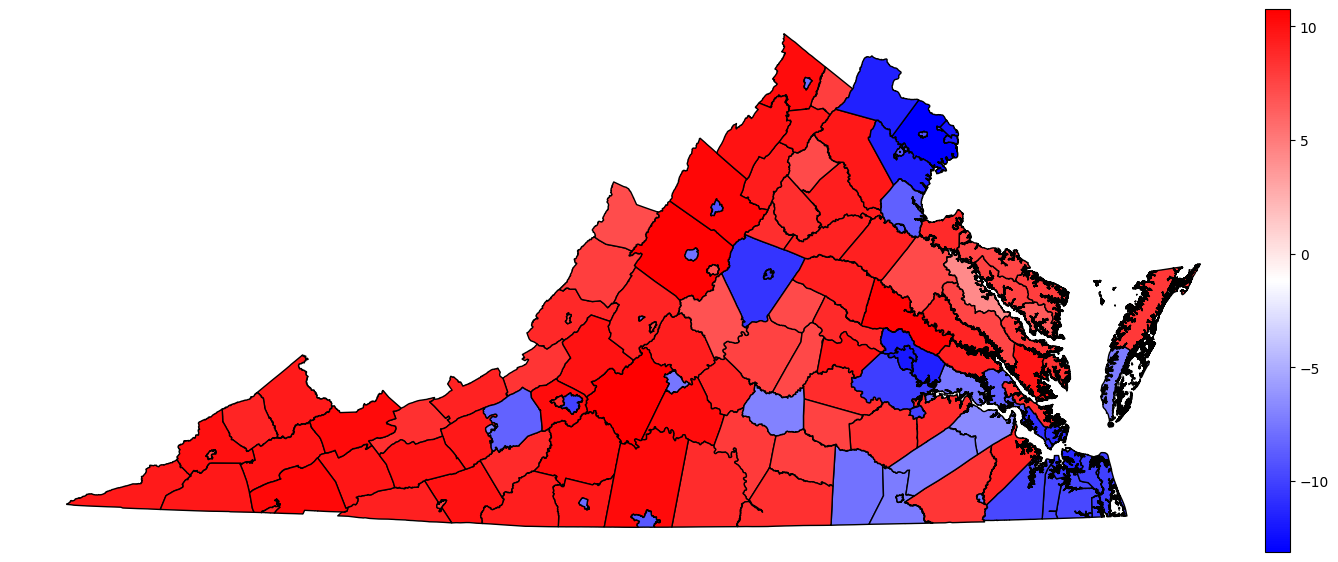

In [25]:
#choropleth map of the difference in Dem and Rep votes
df['vote_diff_ihs'] = np.arcsinh(df['vote_diff'])

fig = plt.figure()
ax = fig.add_axes([0, 0, 2, 2])
divider = make_axes_locatable(ax)
ax.axis('off')
cax = divider.append_axes("right", size="2%", pad=0.08)
df.plot(ax=ax,column='vote_diff_ihs',legend=True,cax=cax,cmap='bwr',edgecolor='k')